# **Support Vector Machine**
For classification of Processed Energy Dataset.

In [ ]:
# Import the standard tools for pythonic data analysis. 
import csv
import math
import random
import numpy as np 
import pandas as pd 

## Initial import and basic understanding of data

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

# Import the final dataset as dataframe from csv
df = pd.read_csv('/content/gdrive/MyDrive/CS3244 Team 05/Dataset Analysis/fixed_data_train.csv',sep=',',low_memory=False)

Mounted at /content/gdrive


In [ ]:
df.head()

,Unnamed: 0,client_id,district,client_catg,region,region_group,creation_date_day,creation_date_month,creation_date_year,no_months_as_client,...,tally_check_false,sum_tally_value,min_tally_value,max_tally_value,mean_tally_value,counter_type,last_year,last_month,last_day,last_day_is_weekday
0,0,train_Client_0,60,11,101,2,31,12,1994,290.568595,...,0,0,0,0,0.0,1,2019,3,19,1
1,1,train_Client_1,69,11,107,2,29,5,2002,202.123247,...,0,0,0,0,0.0,1,2019,4,2,1
2,2,train_Client_10,62,11,301,3,13,3,1986,397.642662,...,0,0,0,0,0.0,1,2019,5,2,1
3,3,train_Client_100,69,11,105,2,7,11,1996,190.591183,...,0,0,0,0,0.0,1,2012,9,25,1
4,4,train_Client_1000,62,11,303,3,14,10,2014,56.083287,...,0,0,0,0,0.0,1,2019,6,17,1


In [ ]:
df.dtypes # Checking for data types

Unnamed: 0                        int64
client_id                        object
district                          int64
client_catg                       int64
region                            int64
region_group                      int64
creation_date_day                 int64
creation_date_month               int64
creation_date_year                int64
no_months_as_client             float64
services_consumed                 int64
target                            int64
months_of_service               float64
number_of_counter                 int64
number_of_instances               int64
number_of_person_counting         int64
min_reading_remark                int64
max_reading_remark                int64
mean_reading_remark             float64
mean_difference_index           float64
sum_difference_index              int64
min_difference_index              int64
max_difference_index              int64
min_counter_statue                int64
max_counter_statue                int64


## Data Cleaning or Selection

In [ ]:
del df['Unnamed: 0'] # Delete Index of CSV file
del df['client_id'] # Delete client_id as it is a string and can't be used as a feature

## Separating Training and Testing Data

Partition the dataset such that both training and testing data have a good mixed of fraud and no fraud data by randomness.



In [ ]:
from sklearn.model_selection import train_test_split

# Partion the features from the target to predict
df_features = df[df.columns[df.columns != 'target']].copy() # get columns that are not 'target'; this our features
df_target = df['target'].copy() # get the column named 'target'; this is our label

# (random_state): we use a fixed random seed so we get the same results every time.
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=1) ## RANDOM STATE DETERMINED HERE

print ("Number of training instances: ", len(X_train), "\nNumber of test instances: ", len(X_test), "\nTotal number of instances: ",len(df_target))

Number of training instances:  94840 
Number of test instances:  40647 
Total number of instances:  135487


## Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

print('Original dataset shape %s' % Counter(y_train)) # Number of training instances for non fraud and fraud (Initial)
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train)) # Number of training instances for non fraud and fraud (After oversampling)

Original dataset shape Counter({0: 89538, 1: 5302})
Resampled dataset shape Counter({0: 89538, 1: 89538})


## Building the SVM Classifier

Hard Margin SVM

In [ ]:
from sklearn.svm import LinearSVC

linear_model = LinearSVC(penalty='l2', #regularization term
                         tol=0.0001, #stopping criterion
                         C=1e10, #regularization parameter
                         fit_intercept=True, #estimation of intercept (data is not centered)
                         max_iter=1000) #maximum number of iterations to be run

Soft Margin SVM

In [ ]:
from sklearn.svm import LinearSVC

linear_model = LinearSVC(penalty='l2', #regularization term
                         loss='hinge', #loss function
                         tol=0.0001, #stopping criterion
                         C=1.0, #regularization parameter
                         fit_intercept=True, #estimation of intercept (data is not centered)
                         max_iter=1000) #maximum number of iterations to be run

SVM with Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier


linear_model = SGDClassifier(loss='hinge', #loss function
                             penalty='l1', #regularization term
                             alpha=0.0001, #constant that multiplies the regularization term
                             fit_intercept=True, #estimation of intercept (data is not centered)
                             max_iter=1000, #maximum number of passes over the training data
                             tol=0.001, #stopping criterion
                             shuffle=True, #training data shuffled after each epoch
                             learning_rate='invscaling', #learning rate schedule
                             eta0=0.01, #initial learning rate
                             power_t=0.5, #exponent for inverse scaling learning rate
                             n_iter_no_change=5) #Number of iterations with no improvement to wait before stopping fitting

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svm = make_pipeline(StandardScaler(), linear_model) 
# StandardScaler: standardize features due to the L1 and L2 regularizers
# Pipeline: sequentially apply a list of StandardScaler transforms with the SVM model

## Training the SVM Classifier

In [ ]:
svm.fit(X_train, y_train)

training_accuracy = svm.score(X_train, y_train)
print(training_accuracy)

0.7531383323281735


## Testing of the SVM Classifier

In [ ]:
predictions = svm.predict(X_test)

test_accuracy = svm.score(X_test, y_test)
print(test_accuracy)

0.8018549954486186


##Evaluation Metrics

Accuracy: 0.8018549954486186
Precision: 0.1766808130444494
Recall: 0.6987632508833922
F1 score: 0.2820467106436085
F2 score: 0.43920044419766796
ROC AUC: 0.753349527898513
Confusion matrix: 
 [[31011  7372]
 [  682  1582]]


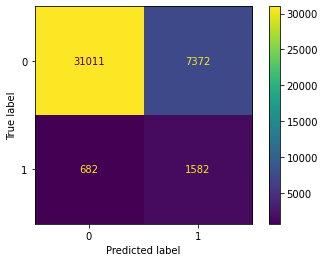

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, predictions)
balanced_accuracy = metrics.balanced_accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
recall = metrics.recall_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)
f2 = metrics.fbeta_score(y_test, predictions, beta=2.0)
roc_auc = metrics.roc_auc_score(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")
print(f"F2 score: {f2}")
print(f"ROC AUC: {roc_auc}")
print(f"Confusion matrix: \n {metrics.confusion_matrix(y_test, predictions)}")

# Plot confusion metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svm.classes_)
disp.plot()
plt.show()

##Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cross_val_score(svm, df_features, df_target, cv=StratifiedKFold(shuffle=True), scoring='accuracy').mean()

0.9441570041381772

## References

1. https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier
3. https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200
4. https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496
5. https://www.baeldung.com/cs/svm-hard-margin-vs-soft-margin
6. https://towardsdatascience.com/the-support-team-svm-555d2c30b1b3
7. https://stackoverflow.com/questions/12355434/svm-with-hard-margin-and-c-value
8.https://stats.stackexchange.com/questions/74499/what-is-the-loss-function-of-hard-margin-svm
9. https://www.section.io/engineering-education/regularization-to-prevent-overfitting/
10. https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization
11. https://towardsdatascience.com/solving-svm-stochastic-gradient-descent-and-hinge-loss-8e8b4dd91f5b
12. https://medium.com/@divakar_239/stochastic-vs-batch-gradient-descent-8820568eada1